# Sheet 5 - Solutions

## Task 1

In [1]:
import scipy as sc
from scipy import linalg as la
from matplotlib import pyplot as plt 

A = sc.array([[0,1],[2,1],[2,1]])
b = sc.array([1,1,2]).reshape(-1,1) 

In [2]:
%matplotlib inline

In [3]:
Q,R = la.qr(A, mode="economic")
coeff = la.solve_triangular(R, Q.T @ b)

In [4]:
leastsq = la.lstsq(A,b)
sc.allclose(coeff,leastsq[0])

True

In [5]:
pl = sc.poly1d(coeff[:,0])
E = sum((b[:,0]-pl(A[:,0]))**2) # sum of squared errors, ie, error on the training set
print(E, leastsq[1], la.norm(b-A@coeff,ord=2)**2)

0.5 [0.5] 0.5000000000000001


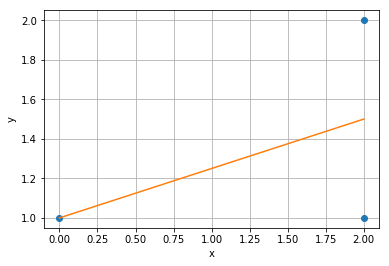

In [6]:
plt.plot(A[:,0],b,'o')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
x = sc.linspace(0,2,50)
plt.plot(x,pl(x))

## Task 2

In [7]:
D=sc.load("../assets/housing.npy")
A=sc.column_stack([D[:,0],sc.ones(D.shape[0])]).reshape(-1,2)
b=sc.array(D[:,1],).reshape(-1,1)

In [8]:
Q,R = la.qr(A, mode="economic")
coeff = la.solve_triangular(R, Q.T @ b)

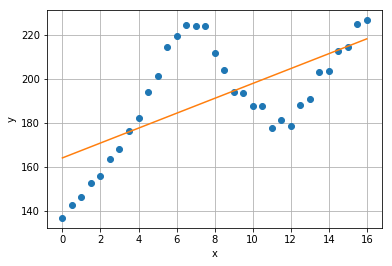

In [9]:
pl = sc.poly1d(coeff[:,0])
plt.plot(A[:,0],b,'o')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
x = sc.linspace(0,16,50)
plt.plot(x,pl(x))

## Task 3

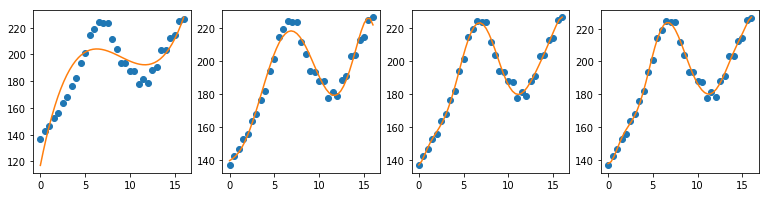

In [10]:
plt.figure(figsize=(13,3))
b = D[:,1].reshape(-1,1)
k = [3,6,9,12]
for i in range(4):
    plt.subplot(1,4,i+1)
    A=sc.vander(D[:,0],k[i]+1)
    coeff = la.lstsq(A, b)[0]
    pl = sc.poly1d(coeff[:,0])
    x = sc.linspace(0,16,50)
    plt.plot(D[:,0],b,'o')
    plt.plot(x,pl(x))

## Task 4

In [11]:
sc.random.seed(5)
m=50
x1 = sc.linspace(0, 1, m)
x2 = sc.linspace(0, 1, m)
y = x1**2-7*x1+2*x2**2+5*x2+sc.random.exponential(1,m) # the unknown target function

In [12]:
A=sc.column_stack([x1,x2,sc.ones(m)]).reshape(-1,3)
coeff = la.lstsq(A,y)[0]
coeff, la.norm(b-A@coeff,ord=2) # root squared errors

(array([0.84938352, 0.84938352, 0.16235147]), 7788.329428639043)

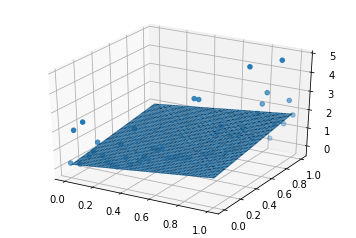

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, marker='o')

X1, X2 = sc.meshgrid(x1, x2)
Y = coeff[0]*X1 + coeff[1]*X2 + coeff[2]
ax.plot_surface(X1, X2, Y)

In [14]:
A=sc.column_stack([x1**2, x1, x2**2, x2, sc.ones(m)]).reshape(-1,5)
coeff = la.lstsq(A,y)[0]
coeff, la.norm(b-A@coeff,ord=2) # root squared errors

(array([ 2.71604846, -1.86666494,  2.71604846, -1.86666494,  1.04922444]),
 7788.347892034986)

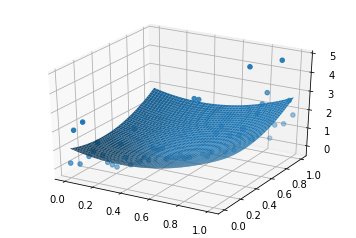

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, marker='o')

Y = coeff[0]*X1**2 + coeff[1]*X1 +coeff[2]*X2**2 + coeff[3]*X2 + coeff[4]
ax.plot_surface(X1, X2, Y)

Looking at the root squared erros on the training set, the first model seems better than the second. However the final decision should be taken on the basis of a test set of points different from the training set. 